# Assignment 5

57584800 WANG Guanzhang 08/03/2023

_Use the Iris dataset to separate the 150 data points into three clusters._
    
_(please note you should <u>not</u> use the "class" attribute in your feature set)._

In [17]:
# prepare Iris for the assignment
import pandas as pd
iris = pd.read_csv('iris.txt',header = None)
iris.columns = ['sepal-L','sepal-W','petal-L','petal-W','class'] 
iris_cluster = pd.DataFrame.copy(iris, deep = True)
iris_cluster = iris_cluster.drop('class', axis = 1 )
iris_cluster

,sepal-L,sepal-W,petal-L,petal-W
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



## 1. Use KMeans to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.

In [18]:
from sklearn import cluster
import numpy as num
iris_Kmeans = cluster.KMeans(n_clusters = 3, max_iter = 100, random_state = 1).fit(iris_cluster)
# Set the random_state = 1 makes the result reproducible.
Kmeans_label = pd.DataFrame(iris_Kmeans.labels_, index = iris_cluster.index, columns = ['class'])
col = iris_cluster.columns.tolist()
col.append("Class")
iris_Kmeans_result = pd.DataFrame(num.concatenate((iris_cluster,Kmeans_label), axis = 1), columns = col)
iris_Kmeans_result


,sepal-L,sepal-W,petal-L,petal-W,Class
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


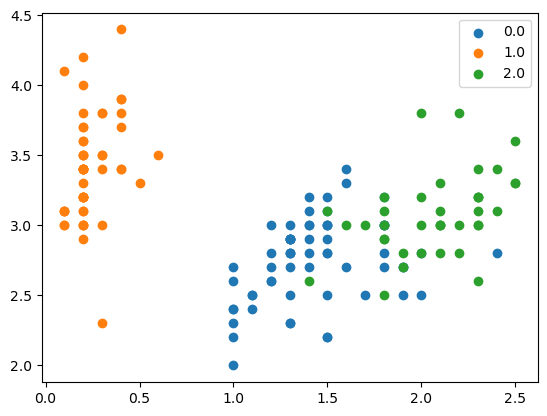

In [19]:
import matplotlib.pyplot as plt
Kmeans_groups = iris_Kmeans_result.groupby("Class")
for name, iris in Kmeans_groups:
    plt.scatter(iris['petal-W'],iris['sepal-W'],marker = 'o', label = name)
plt.legend()
plt.show()

## 2. Use Complete Link to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.

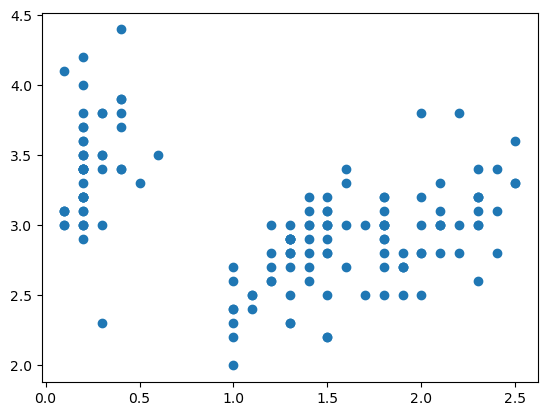

In [20]:
from scipy.cluster import hierarchy
index = iris_cluster.index
Z = hierarchy.linkage(iris_cluster,'complete',optimal_ordering = True)
plt.scatter(iris_cluster['petal-W'],iris_cluster['sepal-W'])
iris_complete_link_result = pd.DataFrame.copy(iris_cluster, deep = True)
iris_complete_link_result['Class'] = hierarchy.fcluster(Z,3,criterion='maxclust')
# Use fcluster() to generate necessary information that we use to generate the scatter, 3 parameters are required.
# Z: Your hierachy result.
# t: the cluster number you want, define a number to generate enough cluster
# criterion: the principle that used to generate the clusters
# In this assignment, the maxclust is required to make sure that 3 clusters has been generate.

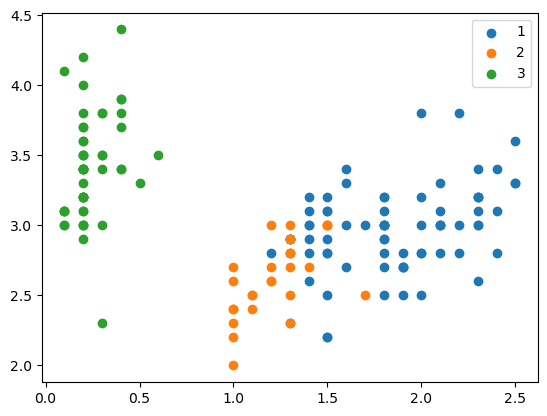

In [21]:
Complete_groups = iris_complete_link_result.groupby("Class")
for name, iris in Complete_groups:
    plt.scatter(iris['petal-W'],iris['sepal-W'],marker = 'o', label = name)
plt.legend()
plt.show()

## 3. Choose one density-based clustering algorithm and present the clustering results.

The choice is DBScan

<AxesSubplot:xlabel='petal-W', ylabel='sepal-W'>

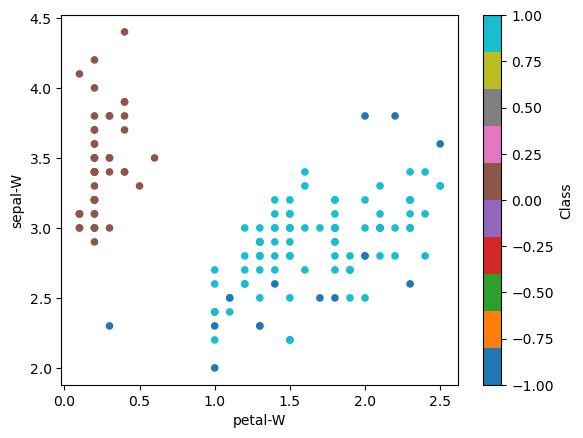

In [22]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5,algorithm = 'auto').fit(iris_cluster)
core_samples_mask = num.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Class'])
iris_DBScan_result = pd.concat((iris_cluster,labels), axis=1)
iris_DBScan_result.plot.scatter(x='petal-W',y='sepal-W',c='Class', colormap='tab10')

## 4. Discuss the clustering mechanisms and results using the method in Q1, 2, and 3.

### Clustering Mechanisms Discussion
#### <font color = #bf165e>K-Means</font>
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the **<font color = #bf165e>number of clusters</font>** to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of _N_ samples _X_ into _K_ disjoint _C_ clusters , each described by the mean $\mu$ <sub>_j_</sub> of the samples in the cluster. The means are commonly called the cluster **<font color = #bf165e>“centroids”</font>**; note that they are not, in general, points from _X_, although they live in the same space.

#### <font color = #bf165e>Hierarchical clustering</font>
In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis that seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two categories:

- Agglomerative: This is a **"bottom-up"** approach: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive: This is a **"top-down"** approach: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering[1] are usually presented in a dendrogram.

In the assignment, we use `SciPy` to make a clustering. `linkage()` method can provide different algorithms. The parameter `"complete"` is the state of **<font color = #bf165e>CompleteLink</font>**,which is known by the **<font color = #bf165e> Farthest Point Algorithm</font>** or **<font color = #bf165e>Voor Hees Algorithm</font>**, in which the first point is selected arbitrarily and each successive point is <u>as far as possible</u> from the set of previously-selected points.

#### <font color = #bf165e>DBScan</font>
The DBSCAN algorithm views clusters as **<font color = #bf165e>areas of high density separated by areas of low density.</font>** Due to this rather generic view, clusters found by DBSCAN <u>can be any shape</u>, **<font color = #bf165e>as opposed to k-means which assumes that clusters are convex shaped.</font>** The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

### Result discussion

Let's tidy up the result outputs for a better discussion.

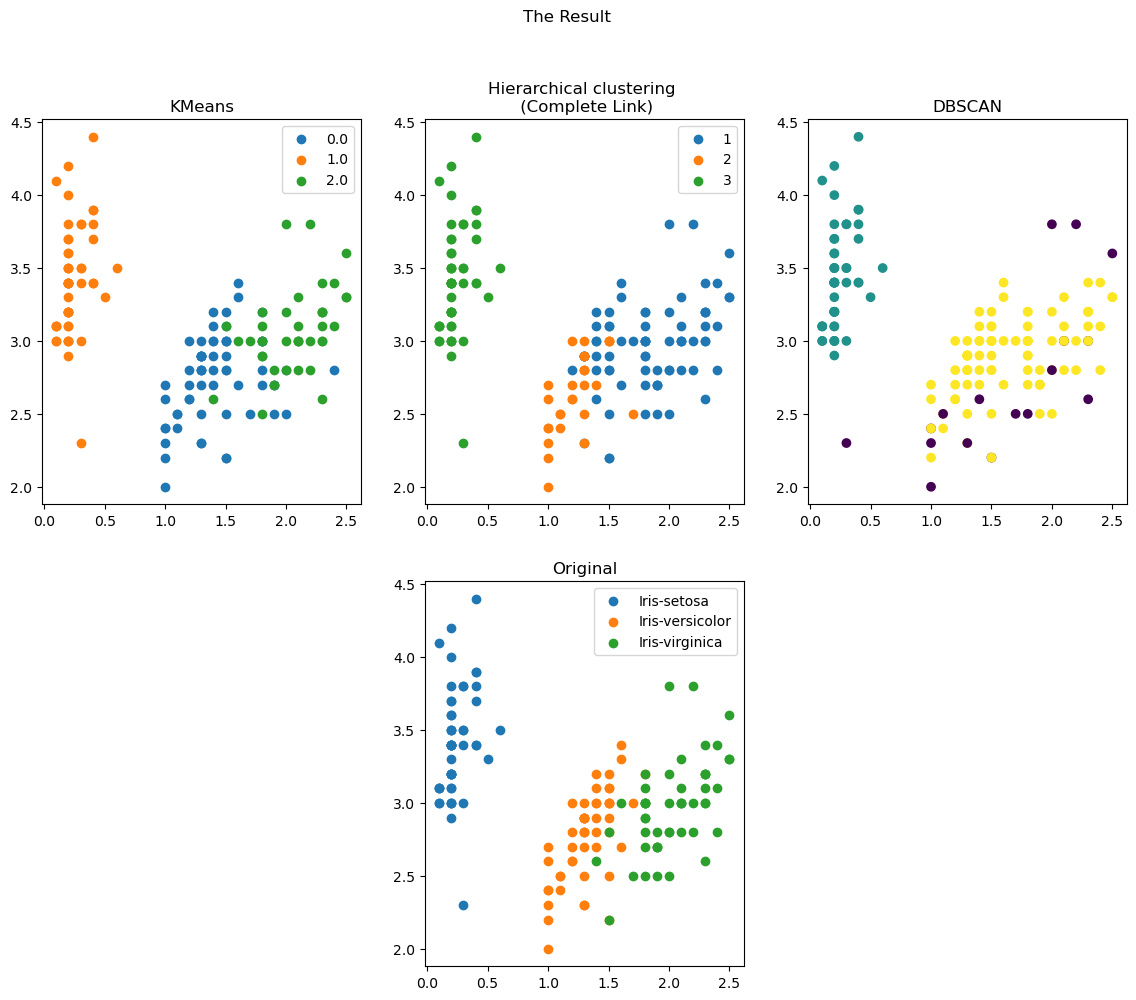

In [23]:
%matplotlib inline
plt.figure(figsize=(14, 11)) 

#K-Means
plt.subplot(231)
for name, iris in Kmeans_groups:
    plt.scatter(iris['petal-W'],iris['sepal-W'],marker = 'o', label = name)
plt.title("KMeans")
plt.legend()

#Complete Link
plt.subplot(232)
for name, iris in Complete_groups:
    plt.scatter(iris['petal-W'],iris['sepal-W'],marker = 'o', label = name)
plt.title("Hierarchical clustering \n (Complete Link)")
plt.legend()

#DBScan
plt.subplot(233)
plt.scatter(iris_DBScan_result['petal-W'],iris_DBScan_result['sepal-W'],c=iris_DBScan_result['Class'])
plt.title("DBSCAN")

#Original scatter as the answer key
plt.subplot(235)
Original = pd.read_csv('iris.txt',header = None)
Original.columns = ['sepal-L','sepal-W','petal-L','petal-W','class'] 
Original_clustering = Original.groupby("class")
for name, group in Original_clustering:
    plt.scatter(group['petal-W'],group['sepal-W'],label = name)
    plt.title("Original")
plt.legend()

#present
plt.suptitle("The Result")
plt.show()

From the original groups, It is clear that the Versicolor and Virginica are **mixed with each other** when the double width is the axis of the diagram, which is hard to earn high performance to the density-based clustering algorithms 

KMeans undoubtedly get the best performance in these three algorithms.  This may be relevant that the numbers of the groups have been given, and the mechanism of KMeans ensures that it is hard to be confused.

The Hierarchical clustering and DBScan presented different degrees of bias in distinguishing the Versicolor and Virginica; the Complete link can still distinguish another group due to the number of groups being defined in the clustering process; the performance is less "perfect" than KMeans but also acceptable in relevant. However, as a density-based clustering algorithm, the similarity between the Versicolor and Virginica makes DBScan have a poor performance even the several `eps` and `min_samples` has been tried, and the best result has been chosen to present in the assignment; the performance is still the worst in these algorithms.

## 5. Review and compare different clustering algorithms and choose another clustering algorithm for the 'elliptical.txt' dataset. Reference link: [Clustering Algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

For this assignment, OPTICS has been chosen.

<AxesSubplot:xlabel='x', ylabel='y'>

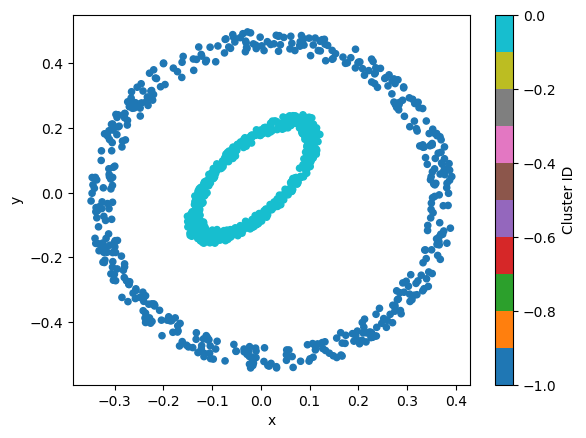

In [24]:
elliptical = pd.read_csv('elliptical.txt', delimiter=' ', names=['x','y'])

OPTICS = cluster.OPTICS(min_samples=100, algorithm='brute').fit(elliptical);
# This set can makes OPTICS get best result
labels = pd.DataFrame(OPTICS.labels_,columns=['Cluster ID'])
result = pd.concat((elliptical,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='tab10')